# Exercise session: clustering US market stocks

Today's exercise session is about analysing trends in US stock markets.

You are given a NumPy array movements of daily price movements from 2010 to 2015, where each row corresponds to a company, and each column corresponds to a trading day.

This exercise is inspired by the excellent tutorial:
https://github.com/benjaminwilson/python-clustering-exercises

The dataset was obtained from the Yahoo! Finance API.



In [ ]:
%matplotlib inline
from pylab import *

In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt

# Get the data

 *   Data are available from: https://blesaux.github.io/teaching/ENSTA

 *   Upload the.company-stock-movements-2010-2015-inclcsv file in your drive and then mount it from colab
  

In [ ]:
USE_COLAB = True
UPLOAD_OUTPUTS = False
if USE_COLAB:
    # mount the goole drive
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    # download data on GoogleDrive
    data_dir = "/content/drive/My Drive/datasets/"
else:
    data_dir = "data/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


* Read data

In [ ]:
import pandas as pd

fn = 'company-stock-movements-2010-2015-incl.csv'
stocks_df = pd.read_csv( os.path.join(data_dir, fn), index_col=0 )

* Explore and understand data:
  * How many companies? How many dates?
  * What are the values?

In [ ]:
print( stocks_df.shape )
# print( stocks_df.columns.values)

stocks_df.head()

(60, 963)


,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


* Eplore and understand data:
  * Show company profiles on a graph
  * Are they similar? What are the min-max values?

(1, 963)
(1, 963)


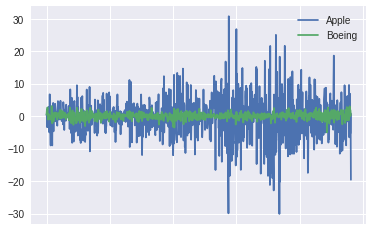

In [ ]:
apple = stocks_df.loc[['Apple']]
print(apple.shape)
apple = apple.T

#apple = stocks_df.iloc[0]
#print(apple.shape)

boeing = stocks_df.loc[['Boeing']]
print(boeing.shape)
boeing = boeing.T

ax = plt.gca()
apple.plot.line(ax=ax)
boeing.plot.line(ax=ax)
plt.show()

# Cluster companies with similar profiles

* use sklearn.cluster:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [ ]:
companies = list(stocks_df.index) # get company names
profiles = stocks_df.values # to array

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=14)
kmeans.fit(profiles)

print(kmeans.labels_)

df = pd.DataFrame({'labels': kmeans.labels_, 'companies': companies})
df.sort_values('labels')

[ 2 10  4  5 11 13  5 13  9  0  7 13  7  5 13 13 13  1  6 13  5 13 13  8
 13  5  5  0  5 11  3  5  7 13 13 12 11  5  5 13  0  5  5  5  7 13  5 13
  5  5 13 13 13  5 13  5  5  7 13 13]


,companies,labels
40,Procter Gamble,0
27,Kimberly-Clark,0
9,Colgate-Palmolive,0
17,Google/Alphabet,1
0,Apple,2
30,MasterCard,3
2,Amazon,4
56,Wal-Mart,5
38,Pepsi,5
31,McDonalds,5


# Cluster companies with similar profiles (again, with normalization)

* Normalize profiles before:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer

* Cluster using k-means:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# start again to be sure to have a good init
companies = list(stocks_df.index) # get company names
profiles = stocks_df.values # to array

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

normalizer = Normalizer()
profiles = normalizer.fit_transform(profiles) # IMPORTANT! the scikit example does not work, should be done like this!!!
#normalizer.transform(profiles)

print(normalizer)
print(profiles[0,:].shape)


Normalizer(copy=True, norm='l2')
(963,)


* Display profiles (Apple / 0 and Boeing / 4, for example)

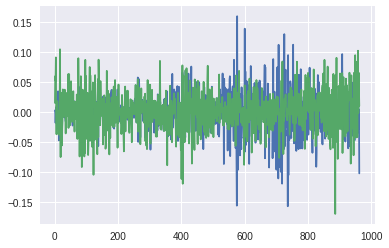

In [ ]:
plot(profiles[0,:])
plot(profiles[4,:])
plt.show()

In [ ]:


kmeans = KMeans(n_clusters=14) #n_clusters=8, init=’k-means++’,
kmeans.fit(profiles)
print(kmeans)

print(kmeans.labels_)

df = pd.DataFrame({'labels': kmeans.labels_, 'companies': companies})
df.sort_values('labels')


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[ 6  3  6  3 10  3 13  2  4  8  5  7  5  4 13  3  3  6  3  1 13  2 13  5
  7  8  3  8 11 10  4 11  4  7  2  4 10 13 11  1  8 11 13 13  5  2  1 13
  2 13  7  7 13  5  9  3  0  5 13 12]


,companies,labels
56,Wal-Mart,0
46,Sanofi-Aventis,1
19,GlaxoSmithKline,1
39,Pfizer,1
48,Toyota,2
7,Canon,2
21,Honda,2
45,Sony,2
34,Mitsubishi,2
16,General Electrics,3


# Clustering, in a pipeline

* Same as before, but in a pipeline

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

-> Useful for cross-validation of a whole processing chain!

In [ ]:
companies = list(stocks_df.index)
movements = stocks_df.values

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

normalizer = Normalizer()
kmeans = KMeans(n_clusters=14)
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(movements)

print(pipeline)

labels = pipeline.predict(movements)
df = pd.DataFrame({'labels': labels, 'companies': companies})
df.sort_values('labels')

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])


,companies,labels
54,Walgreen,0
42,Royal Dutch Shell,1
43,SAP,1
19,GlaxoSmithKline,1
52,Unilever,1
46,Sanofi-Aventis,1
10,ConocoPhillips,1
12,Chevron,1
6,British American Tobacco,1
37,Novartis,1


# Clustering using another algorithm

* Try out another clustering algorithm, for example one of those seen during the course: Agglomerative CLustering, DBScan, Spectral clustering, etc...
   * Motivate your choice!

https://scikit-learn.org/stable/modules/clustering.html

* Analyze
  * How do they differ  from K-Means?
  * What are the parameters?
  * Do they produce the same clusters?

In [ ]:
# start again to be sure to have a good init
companies = list(stocks_df.index) # get company names
profiles = stocks_df.values # to array

# normalize
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
profiles = normalizer.fit_transform(profiles) # IMPORTANT! the scikit example does not work, should be done like this!!!
#normalizer.transform(profiles)

# clusterize
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering

kluster = AgglomerativeClustering(n_clusters=14) #
kluster.fit(profiles)
print(kluster)

print(kluster.labels_)

df = pd.DataFrame({'labels': kluster.labels_, 'companies': companies})
df.sort_values('labels')

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=14,
            pooling_func='deprecated')
[ 3  1  3  8  9  8 11  7  2 12  2  4  2  2  5  1  8  3  8 11  0  7  5  4
  4  6  8 12  6  9 10 10  2  4  7  1  9 11  6  6 12  6 11 11  2  7 11  4
  7 11  4  4 11  2  0  8  0  2  1 13]


,companies,labels
56,Wal-Mart,0
20,Home Depot,0
54,Walgreen,0
1,AIG,1
35,Navistar,1
58,Xerox,1
15,Ford,1
44,Schlumberger,2
32,3M,2
57,Exxon,2


# Code your clustering

* Code K-means by yourself


In [ ]:
# nb clusters
n_clusters = 14

# data samples = profiles
print(profiles.shape)
n_profiles = profiles.shape[0]
dim = profiles.shape[1]
print(n_profiles)

# memberships
u = np.ones( (n_profiles, n_clusters) ) * 1 / n_clusters
print(u.shape)
print(u[32,1])

# prototypes: initialized as true, random profiles (try otherwise)
p = np.zeros((n_clusters,dim))

from random import randrange

for j in range(0,n_clusters):
  rnd_ind = randrange(n_profiles)
  p[j,:] = profiles[rnd_ind,:]

print(p)

(60, 963)
60
(60, 14)
0.07142857142857142
[[ 0.06486984  0.03287915 -0.00888619 ... -0.00977482  0.00799774
  -0.009775  ]
 [-0.09328467 -0.00409144 -0.04091436 ... -0.01963939  0.00409168
  -0.01963865]
 [ 0.03352748  0.01117573 -0.01117573 ... -0.01523987 -0.00406404
  -0.01117593]
 ...
 [ 0.00875232  0.01069733  0.00194501 ... -0.00632103  0.01604602
   0.05591767]
 [ 0.09827515 -0.03871445 -0.0089341  ...  0.01935737  0.04318135
   0.06104971]
 [ 0.02716535 -0.0177534  -0.01454503 ... -0.03379588  0.00663117
   0.09625489]]


In [ ]:
from numpy import linalg as LA
from numpy.linalg import norm

max_iter= 10
dist=np.zeros((n_profiles,n_clusters))
previous_loss=np.Inf


for k in range(0,max_iter):
  # compute u according to data -> closest p
  # compute distances between pixels and prototypes (readable but non-pythonic way)
  for j in range(0,n_clusters):
    for i in range(0,n_profiles):
      dist[i,j] = LA.norm( p[j,:] - profiles[i,:] )

  # compute loss
  loss=np.sum(dist)
  print('Iter #',k)
  print('loss = ',loss)
  if(np.abs(previous_loss-loss) < 1e-3 ):
    break;
  previous_loss=loss

  # get indice of the closest prototype of each point
  amn = np.argmin(dist, axis=1)
  #print(amn)

  # Hard K-Means
  u = np.zeros( (n_profiles, n_clusters) )
  for i in range(0,n_profiles):
    u[i,amn[i]] = 1

  # Fuzzy C-means variant
  #u = 1. / np.square( dist )

  # re-compute p[i,:] according to new memberships
  card=np.zeros(n_clusters)
  for j in range(0,n_clusters):
    card[j] = np.sum(u[:,j])
    #print(card[j])
    if(card[j]>0):# only update prototypes with non-null cardinal
      prot_class = np.average( profiles, axis=0, weights=u[:,j] )
      #print(prot_class)
      p[j,:]=prot_class[:]

  # display current clusters
  #for j in range(0,N):
  #  print(p[j,:])
  #print(card)


print(dist[3,1])

# final clusters and loss
#for j in range(0,n_clusters):
#  print(p[j,:])
print(p[:,0])

labels = np.argmax(u, axis=1)
print(labels)
print(labels.shape)

print('Cluster cardinalities =',card)
print('Final loss =',loss)



Iter # 0
loss =  778.9164345188574
Iter # 1
loss =  778.9164345188574
0.906486149665347
[ 0.04117056 -0.03386954  0.03626953  0.00222092  0.01674005  0.01717433
  0.05341261 -0.00664792  0.02649494  0.04674548  0.0187544   0.00875232
  0.02231799  0.0103565 ]
[ 7  5  7 10  8  5 11  0  4 12 10  2 10 10  2  5 10  7  6  1  3  0  0 13
 13 12  4 12 10  8 13  4 10  2  0  5  8  1  1 12 12  9  4  4 10  6  4  2
  0  4  4  4  4 10  8  4  3 10  0  5]
(60,)
Cluster cardinalities = [ 6.  3.  4.  2. 11.  5.  2.  3.  4.  1. 10.  1.  5.  3.]
Final loss = 778.9164345188574


In [ ]:
df = pd.DataFrame({'labels': labels, 'companies': companies})
df.sort_values('labels')

,companies,labels
34,Mitsubishi,0
21,Honda,0
58,Xerox,0
7,Canon,0
48,Toyota,0
22,HP,0
19,GlaxoSmithKline,1
37,Novartis,1
38,Pepsi,1
14,Dell,2
